In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
consumer_key = 'fv6RR63biGkVPEbS13GP37EGW'
consumer_secret = 'eSx2cTC5DkrTAZCb8Y4NOhjRC3JBPDjq2DZDJAS1YX0RJ2tjiC'
access_token = '1235380439457595395-tLGeMVWCBxVNzgBuqCRXw3JiT2IRh7' 
access_token_secret = '4tvwVHcAFkYPjV4iXQi2TczsIU5qEqbxjYANddPmyGRPn'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [5]:
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [6]:
posts = api.user_timeline(screen_name = 'Guardian', count=100, lang = 'en', tweet_mode='extended')

In [7]:
for tweet in posts[0:5]:
    print(tweet.full_text + '\n')

Australian theme parks to remain open as coronavirus closures mount https://t.co/EolYrCPH20

Australian supermarkets limit sales of essentials to prevent coronavirus panic buying https://t.co/54oI1vyGeF

Coronavirus latest: at a glance https://t.co/trq5vuG8Dj

Why has coronavirus testing in the US been such a disaster? https://t.co/19S8iPvGNd

Coronavirus latest updates: Trump may extend US travel ban, Australia warns disease may not peak for months https://t.co/UzZ26mDM9x



In [8]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [9]:
 df.head()

,Tweets
0,Australian theme parks to remain open as coron...
1,Australian supermarkets limit sales of essenti...
2,Coronavirus latest: at a glance https://t.co/t...
3,Why has coronavirus testing in the US been suc...
4,Coronavirus latest updates: Trump may extend U...


In [10]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

In [11]:
df['Tweets'] = df['Tweets'].apply(clean_text)

In [12]:
df.head()

,Tweets
0,Australian theme parks to remain open as coron...
1,Australian supermarkets limit sales of essenti...
2,Coronavirus latest: at a glance
3,Why has coronavirus testing in the US been suc...
4,Coronavirus latest updates: Trump may extend U...


In [13]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

In [17]:
df.head(10)

,Tweets,Subjectivity,Polarity
0,Australian theme parks to remain open as coron...,0.25,0.0
1,Australian supermarkets limit sales of essenti...,0.00,0.0
2,Coronavirus latest: at a glance,0.90,0.5
3,Why has coronavirus testing in the US been suc...,0.50,0.0
4,Coronavirus latest updates: Trump may extend U...,0.90,0.5
5,'I don't take responsibility': Trump shakes ha...,0.00,0.0
6,She's a legend in the fight against HIV. Now D...,0.00,0.0
7,Rough sleepers and drug users not getting coro...,0.40,-0.1
8,"UN too scared to stop breaches of arms ban, sa...",0.00,0.0
9,'They would have been slaughtered': Coronaviru...,0.00,0.0


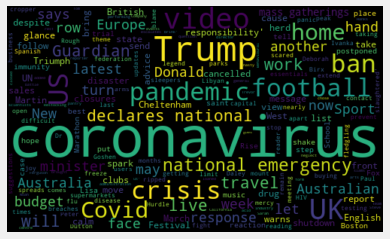

In [19]:
all_words = ' '.join([twts for twts in df['Tweets']])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
def sentiment_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [22]:
df['Analysis'] = df['Polarity'].apply(sentiment_analysis)
df.head(10)

,Tweets,Subjectivity,Polarity,Analysis
0,Australian theme parks to remain open as coron...,0.25,0.0,Neutral
1,Australian supermarkets limit sales of essenti...,0.00,0.0,Neutral
2,Coronavirus latest: at a glance,0.90,0.5,Positive
3,Why has coronavirus testing in the US been suc...,0.50,0.0,Neutral
4,Coronavirus latest updates: Trump may extend U...,0.90,0.5,Positive
5,'I don't take responsibility': Trump shakes ha...,0.00,0.0,Neutral
6,She's a legend in the fight against HIV. Now D...,0.00,0.0,Neutral
7,Rough sleepers and drug users not getting coro...,0.40,-0.1,Negative
8,"UN too scared to stop breaches of arms ban, sa...",0.00,0.0,Neutral
9,'They would have been slaughtered': Coronaviru...,0.00,0.0,Neutral


In [25]:
positive_df = df.sort_values(by=['Polarity'])
j = 1
for i in range(0, positive_df.shape[0]):
    if(positive_df['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + positive_df['Tweets'][i])
        print()
        j = j + 1

1) Coronavirus latest: at a glance 

2) Coronavirus latest updates: Trump may extend US travel ban, Australia warns disease may not peak for months 

3) Your coronavirus reading list: reader suggestions to bring joy in difficult times 

4) How Spanish flu nearly ripped apart Australia's fledgling federation | Paul Daley 

5) Behavioural scientists form new front in battle against coronavirus 

6) WHO director general: Europe is now at centre of coronavirus pandemic – video 

7) Trump's changing reactions to coronavirus: from calm to closing borders – video report 

8) Inside an ICU: how long can we stay calm in the face of the coronavirus crisis? 

9) Experts question Bupa care home ban on most family visits 

10) Coronavirus latest: 13 March at a glance 

11) Trump says he takes 'no responsibility' for coronavirus failures as he declares national emergency – follow live 

12) Governing bodies face a fraught future as game we love grinds to halt 

13) Donald Trump declares national eme

In [26]:
negative_df = df.sort_values(by=['Polarity'], ascending=False)
j = 1
for i in range(0, negative_df.shape[0]):
    if(negative_df['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + negative_df['Tweets'][i])
        print()
        j = j + 1

1) Rough sleepers and drug users not getting coronavirus advice 

2) California schools closed and events cancelled as state escalates Coronavirus response 

3) Coronavirus: Trump slams reporter for 'nasty question' over pandemic response team – video 

4) Guardian front page, Saturday 14 March 2020: Mass gatherings banned as PM forced into U-turn 

5) British clubs plunged into uncertainty after football closes down 

6) Yes, it’s grim. And the British way with contagion has barely changed since 1665 | Marina Hyde 

7) Accidental countryside: why nature thrives in unlikely places 

8) Football shuts down because of coronavirus – video report 

9) Mother worker allegedly abused Man Utd guards 'hurt' by response 

10) From dumplings to dal: what to cook now to eat if you get ill 

11) Would a society of moral saints be a worse place to live? | Oliver Burkeman 



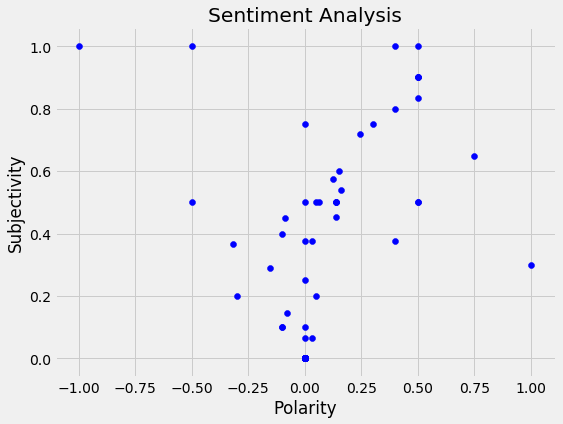

In [27]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [30]:
pos_tweets = df[df.Analysis == 'Positive']
pos_tweets = pos_tweets['Tweets']

round((pos_tweets.shape[0] / df.shape[0])*100, 1)

26.0

In [31]:
neg_tweets = df[df.Analysis == 'Negative']
neg_tweets = neg_tweets['Tweets']

round((neg_tweets.shape[0] / df.shape[0])*100, 1)

11.0

In [32]:
neu_tweets = df[df.Analysis == 'Neutral']
neu_tweets = neu_tweets['Tweets']

round((neu_tweets.shape[0] / df.shape[0])*100, 1)

63.0

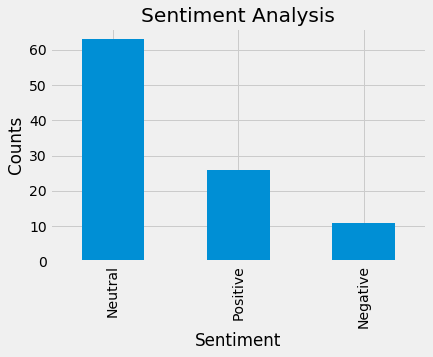

In [35]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()